In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

# kolmov exporter
from kolmov.core.kringer_df import kringer_df
from kolmov.core.kplot import kquadrant_pocket


Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


In [2]:
base_path     = os.environ['DATA_PATH']
tunes_path    = os.environ['TUNES_PATH']
analysis_path = os.environ['ANALYSIS_PATH']
print('Variables path defined \n base: %s \n tunes: %s \n analysis: %s' %(base_path,
                                                                          tunes_path,
                                                                          analysis_path))

Variables path defined 
 base: /home/micael/Documents/NeuralRinger/jpsiee_data 
 tunes: /home/micael/Documents/NeuralRinger/jpsiee_tunes 
 analysis: /home/micael/Documents/NeuralRinger/jpsiee_analysis


In [3]:
operation_point = 'Tight'
data18_path     = os.path.join(base_path,
'data18_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97/data18_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM2.bkg.VProbes_EGAM7.GRL_v97_et%i_eta%i.npz')

v1_calib_path      = os.path.join(analysis_path,
                                 'v1.data17/exported_tunings/TrigL2_20200805_mlp5.v1.jsons')

v1_mlp2_calib_path = os.path.join(analysis_path,
                                 'v1.data17/exported_tunings/TrigL2_20200805_mlp2.v1.jsons')

print('Using %s tunings in: \n %s' %(operation_point, v1_calib_path))

model_name, thr_name = ('TrigL2CaloRingerElectron%sConstants.json' %(operation_point),
                        'TrigL2CaloRingerElectron%sThresholds.json' %(operation_point))
# tuning dictionary to be attached into pandas Dataframe
tuning_dict = {
    'v1_5neurons' : (os.path.join(v1_calib_path, model_name),
                     os.path.join(v1_calib_path, thr_name)),
    'v1_2neurons'  : (os.path.join(v1_mlp2_calib_path, model_name),
                      os.path.join(v1_mlp2_calib_path, thr_name))
}

Using Tight tunings in: 
 /home/micael/Documents/NeuralRinger/jpsiee_analysis/v1.data17/exported_tunings/TrigL2_20200805_mlp5.v1.jsons


In [4]:
et, eta = 2, 0
data18 = dict(np.load(data18_path %(et, eta)))
print(data18.keys())

dict_keys(['features', 'etBins', 'etaBins', 'etBinIdx', 'etaBinIdx', 'data', 'target'])


In [5]:
kringer  = kringer_df(data18)
kringer.add_tuning_decision(tuning_dict)

# now get the pandas to work
ringer_df = kringer.get_df()

For v1_5neurons using threshold: -0.9277 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 505       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________
None


For v1_2neurons using threshold: -0.9312 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_3

In [6]:
ringer_df.head()

,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,T0HLTElectronT2CaloMedium,T0HLTElectronT2CaloLoose,T0HLTElectronT2CaloVLoose,HLT__isLHTight,HLT__isLHMedium,HLT__isLHLoose,HLT__isLHVLoose,target,v1_5neurons,v1_2neurons
0,27.469999,387.098663,-89.680824,-255.651337,-287.546844,110.434181,-58.393150,-442.061249,-153.431427,1928.999146,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
1,27.430000,256.859467,11.232599,79.235909,307.981049,294.465027,156.160309,105.975983,-86.119347,1715.609009,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
2,27.044315,722.743591,597.676758,217.899933,-407.054474,216.712311,109.028130,626.465759,-36.638813,2316.582764,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
3,27.044315,722.743591,597.676758,217.899933,-407.054474,216.712311,109.028130,626.465759,-36.638813,2316.582764,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0
4,26.740000,346.583282,6.475327,239.444763,142.588318,106.107285,43.513710,-145.464417,-149.455276,2121.921143,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0


In [7]:
cols_analysis = { 
    'l2_var'       : ['L2Calo_et',
                      'L2Calo_eta',
                      'L2Calo_phi',
                      'L2Calo_reta',
                      'L2Calo_eratio',
                      'L2Calo_f1'],

    'shower_shape' : ['avgmu',
                      'et',
                      'eta',
                      'phi',
                      'eratio',
                      'reta',
                      'rphi',
                      'f1',
                      'f3',
                      'rhad',
                      'rhad1',
                      'wtots1',
                      'weta1',
                      'weta2',
                      'e277',
                      'deltaE'],

    'el_id'        : ['el_lhtight',
                      'el_lhmedium',
                      'el_lhloose',
                      'el_lhvloose'],

    't2calo'        : ['T0HLTElectronT2CaloTight',
                       'T0HLTElectronT2CaloMedium',
                       'T0HLTElectronT2CaloLoose',
                       'T0HLTElectronT2CaloVLoose'],

    'tunings'       : ['v1_5neurons',
                       'v1_2neurons',
                       'target']
}
print(cols_analysis.keys())

dict_keys(['l2_var', 'shower_shape', 'el_id', 't2calo', 'tunings'])


In [8]:
shower_shape_df = ringer_df[(cols_analysis['shower_shape'] +\
                             cols_analysis['t2calo']       +\
                             cols_analysis['tunings'])].copy()
shower_shape_df.head()

,avgmu,et,eta,phi,eratio,reta,rphi,f1,f3,rhad,...,weta2,e277,deltaE,T0HLTElectronT2CaloTight,T0HLTElectronT2CaloMedium,T0HLTElectronT2CaloLoose,T0HLTElectronT2CaloVLoose,v1_5neurons,v1_2neurons,target
0,27.469999,11034.149414,0.417437,-2.548202,0.952266,1.022851,0.915003,0.528980,-0.000031,-0.003333,...,0.011526,4718.567871,4718.567871,1.0,1.0,1.0,1.0,1.0,1.0,1
1,27.430000,14200.937500,-0.305597,2.304199,1.000000,0.930242,1.004401,0.293302,0.006871,-0.008718,...,0.008437,10039.893555,10039.893555,1.0,1.0,1.0,1.0,1.0,1.0,1
2,27.044315,10887.302734,-0.068041,2.189435,0.953034,0.995752,0.986483,0.407384,0.002819,0.002063,...,0.010542,5776.427246,5776.427246,1.0,1.0,1.0,1.0,1.0,1.0,1
3,27.044315,15453.251953,-0.278528,2.062286,0.966205,0.911584,0.892798,0.522314,0.004748,0.002341,...,0.010449,7019.850098,7019.850098,1.0,1.0,1.0,1.0,1.0,1.0,1
4,26.740000,14244.715820,-0.005613,-2.852980,0.967012,0.876455,0.992065,0.421238,-0.000164,-0.025160,...,0.009408,8373.983398,8373.983398,1.0,1.0,1.0,1.0,1.0,1.0,1


In [9]:
# filters
sgn_condition        = (shower_shape_df.target == 1)
bkg_condition        = (shower_shape_df.target == 0)     
agree_condition      = (shower_shape_df.v1_5neurons == shower_shape_df.v1_2neurons)
disagree_condition   = (shower_shape_df.v1_5neurons != shower_shape_df.v1_2neurons)
v1_5neurons_acc_only = ((shower_shape_df.v1_5neurons == 1.) &\
                        (shower_shape_df.v1_2neurons == 0.))
v1_2neurons_acc_only = ((shower_shape_df.v1_2neurons == 1.) &\
                        (shower_shape_df.v1_5neurons == 0.))

In [10]:
# v1_5neurons
pd_v1_5neurons = (shower_shape_df[((sgn_condition) &\
                        (shower_shape_df.v1_5neurons == 1.))]['v1_5neurons'].sum() / \
                 len(shower_shape_df[sgn_condition]))

fa_v1_5neurons = (shower_shape_df[((bkg_condition) &\
                    (shower_shape_df.v1_5neurons == 1.))]['v1_5neurons'].sum() /\
                 len(shower_shape_df[bkg_condition]))

# v1_2neurons
pd_v1_2neurons = (shower_shape_df[((sgn_condition) &\
                          (shower_shape_df.v1_2neurons == 1.))]['v1_2neurons'].sum()/\
                 len(shower_shape_df[sgn_condition]))

fa_v1_2neurons = (shower_shape_df[((bkg_condition) &\
                          (shower_shape_df.v1_2neurons == 1.))]['v1_2neurons'].sum()/\
                 len(shower_shape_df[bkg_condition]))

eff_df = pd.DataFrame(data={'pd'     : [pd_v1_5neurons, pd_v1_2neurons],
                            'fa'     : [fa_v1_5neurons, fa_v1_2neurons],
                            'tuning' : ['v1_5neurons', 'v1_2neurons']})
eff_df.set_index('tuning', inplace=True)
eff_df*100


,pd,fa
tuning,,
v1_5neurons,98.817538,8.857090
v1_2neurons,98.778698,8.671116


In [11]:
agree_rate = [
    (len(shower_shape_df[((sgn_condition) &\
                         (agree_condition))])\
    / \
    len(shower_shape_df[(sgn_condition)]))*100,
    (len(shower_shape_df[((bkg_condition) &\
                         (agree_condition))])\
    / \
    len(shower_shape_df[(bkg_condition)]))*100,
]

disagree_rate = [
    (len(shower_shape_df[((sgn_condition) &\
                         (disagree_condition))])\
    / \
    len(shower_shape_df[(sgn_condition)]))*100,
    (len(shower_shape_df[((bkg_condition) &\
                         (disagree_condition))])\
    / \
    len(shower_shape_df[(bkg_condition)]))*100,
]

type = ['signal', 'background']
rates = pd.DataFrame(data=np.array([agree_rate, disagree_rate]).T, columns=['agree_rate', 'disagree_rate'])

rates.index=type
rates.round(2)

,agree_rate,disagree_rate
signal,99.84,0.16
background,99.45,0.55


# Plot the Shower Shapes

In [12]:
tag1 = 'v1_mlp5'
tag2 = 'v1_mlp2'

egam2_plot_config = {
    'avgmu'  : { 
        'var_name'    : r'$\langle \mu \rangle$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -0.5,
        'high_edge'   : 60.5,
        'nbins'       : 62
    },

    'eratio' : {
        'var_name'    : r'$E_{ratio}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : 0.50,
        'high_edge'   : 1.05,
        'nbins'       : 100
    },
    
    'rhad'   : {
        'var_name'    : r'$R_{had}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -.05,
        'high_edge'   : 0.05,
        'nbins'       : 200
    },

    'reta'   : {
        'var_name'    : r'$R_{\eta}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : 0.80,
        'high_edge'   : 1.10,
        'nbins'       : 200
    },

    'f1'     : {
        'var_name'    : r'$f_1$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -.02,
        'high_edge'   : 0.7,
        'nbins'       : 100
    },

    'f3'     : {
        'var_name'    : r'$f_3$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -.05,
        'high_edge'   : 0.15,
        'nbins'       : 200
    },

    'wtots1' : {
        'var_name'    : r'$w_{tots,1}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : sgn_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : 0.00,
        'high_edge'   : 8.00,
        'nbins'       : 100
    },

}

In [13]:
plot_path = os.path.join(analysis_path, 'v1.data17/plots/mini_quadrant_v1_mlp5_vs_mlp2')
print('The plots will be saved in: \n %s' %(plot_path))

The plots will be saved in: 
 /home/micael/Documents/NeuralRinger/jpsiee_analysis/v1.data17/plots/mini_quadrant_v1_mlp5_vs_mlp2


Plotting avgmu... 
Plotting eratio... 
Plotting rhad... 
Plotting reta... 
Plotting f1... 
Plotting f3... 
Plotting wtots1... 


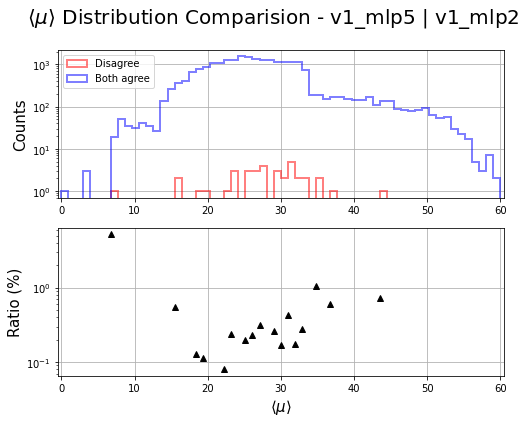

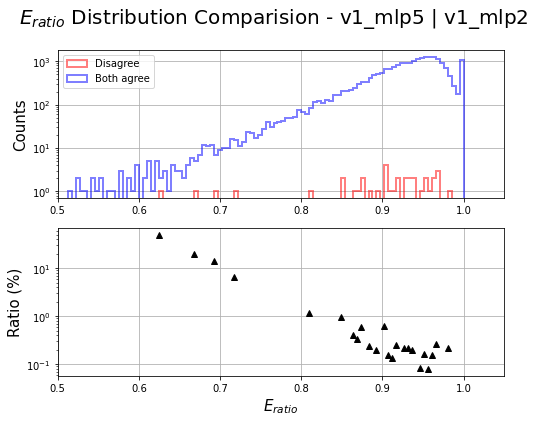

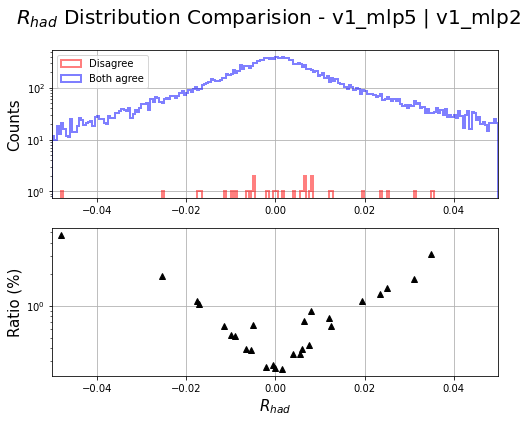

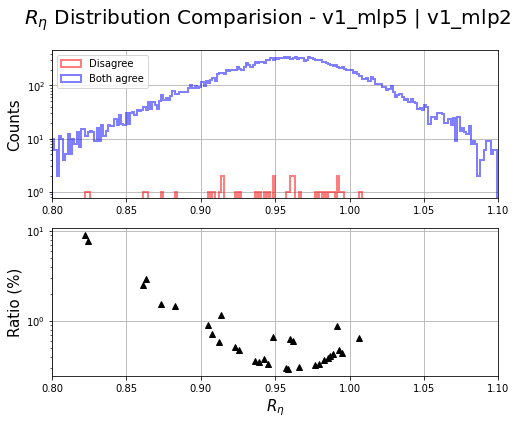

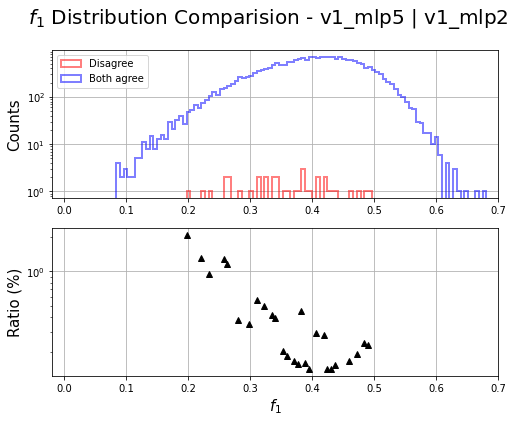

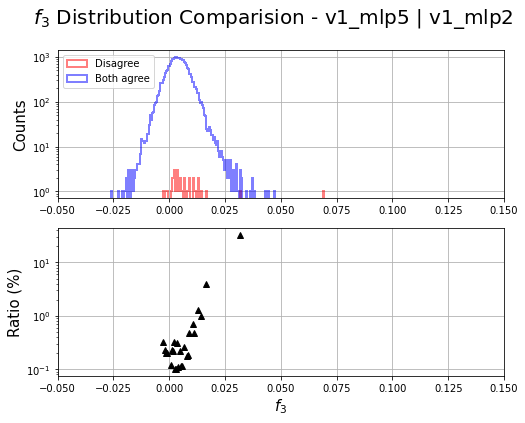

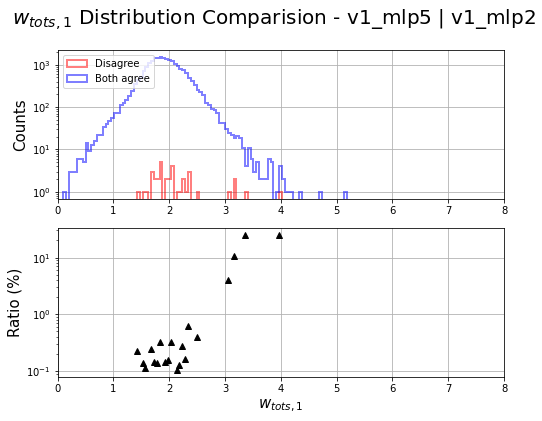

In [14]:
kquadrant_pocket(shower_shape_df, egam2_plot_config, 
                 output_path=os.path.join(plot_path,'EGAM2'))


In [15]:
egam7_plot_config = {
    'avgmu'  : { 
        'var_name'    : r'$\langle \mu \rangle$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -0.5,
        'high_edge'   : 60.5,
        'nbins'       : 62
    },

    'eratio' : {
        'var_name'    : r'$E_{ratio}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : 0.50,
        'high_edge'   : 1.05,
        'nbins'       : 100
    },
    
    'rhad'   : {
        'var_name'    : r'$R_{had}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -.05,
        'high_edge'   : 0.05,
        'nbins'       : 200
    },

    'reta'   : {
        'var_name'    : r'$R_{\eta}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : 0.80,
        'high_edge'   : 1.10,
        'nbins'       : 200
    },

    'f1'     : {
        'var_name'    : r'$f_1$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -.02,
        'high_edge'   : 0.7,
        'nbins'       : 100
    },

    'f3'     : {
        'var_name'    : r'$f_3$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : -.05,
        'high_edge'   : 0.15,
        'nbins'       : 200
    },

    'wtots1' : {
        'var_name'    : r'$w_{tots,1}$',
        'cond1_label' : 'Both agree',
        'cond2_label' : 'Disagree',
        'cond1'       : agree_condition,
        'cond2'       : disagree_condition,
        'common_cond' : bkg_condition,
        'title_tag1'  : tag1,
        'title_tag2'  : tag2,
        'low_edge'    : 0.00,
        'high_edge'   : 8.00,
        'nbins'       : 100
    },

}

Plotting avgmu... 
Plotting eratio... 
Plotting rhad... 
Plotting reta... 
Plotting f1... 
Plotting f3... 
Plotting wtots1... 


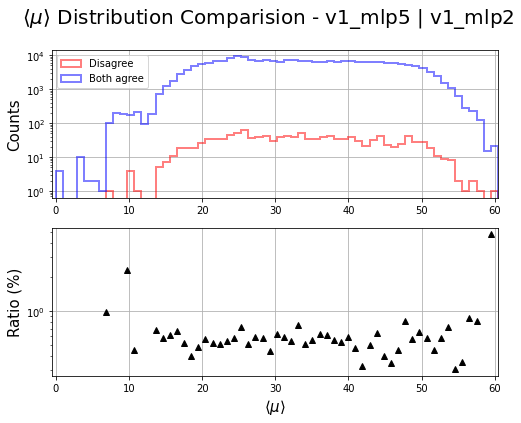

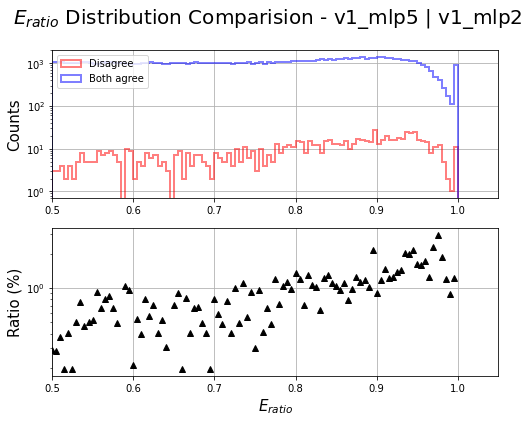

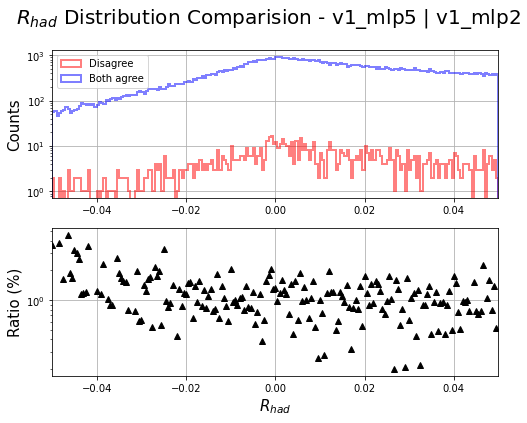

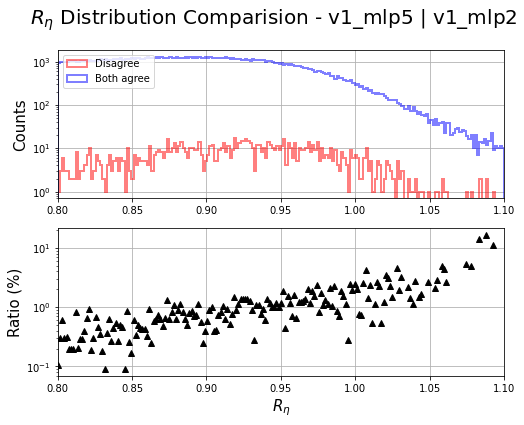

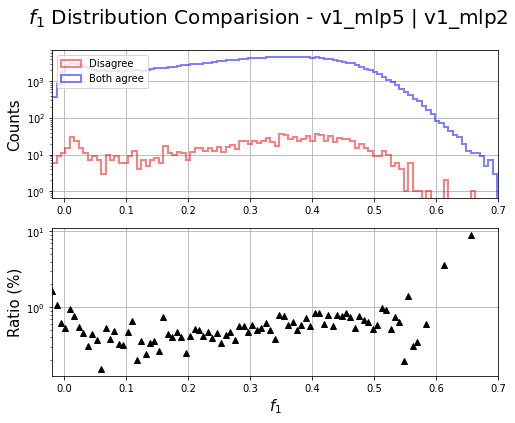

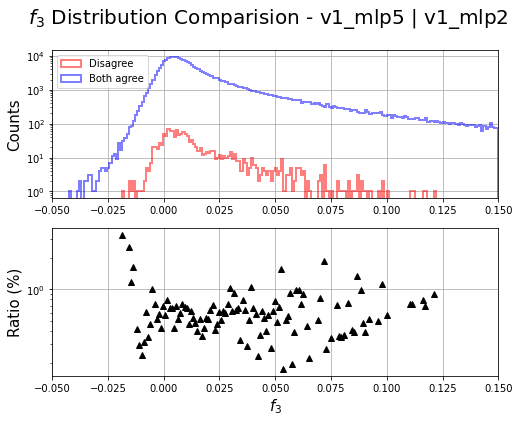

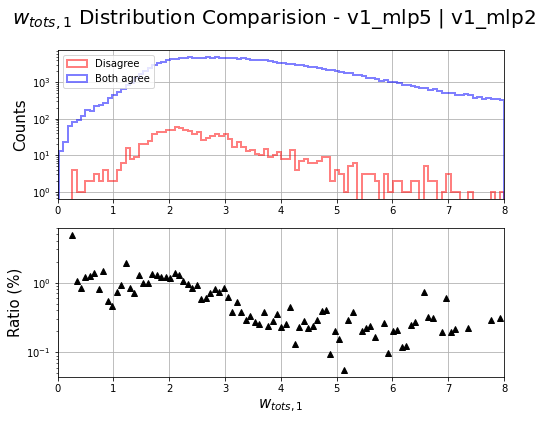

In [16]:
kquadrant_pocket(shower_shape_df, egam7_plot_config, 
                 output_path=os.path.join(plot_path, 'EGAM7'))

In [17]:
len(shower_shape_df[bkg_condition & disagree_condition])

1293

In [18]:
shower_shape_df.groupby(['target', 'v1_5neurons', 'v1_2neurons'])['v1_2neurons'].count().to_frame('Contagem')

Contagem
target v1_5neurons v1_2neurons          
0      0.0         0.0            212757
                   1.0               429
       1.0         0.0               864
                   1.0             19853
1      0.0         0.0               260
                   1.0                14
       1.0         0.0                23
                   1.0             22875

In [ ]:
dis = shower_shape_df.v1_2neurons != shower_shape_df.v1_5neurons
shower_shape_df[dis]